<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500,>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Домашнее задание: соревнование на Kaggle по распознаванию одежды</b></h2>

---

Всем привет!  

Надеемся, что вам показались интересными и понятными лекция и семинар по многослйным нейросетям и PyTorch. Если же Вы ещё не успели ими насладиться -- просьба посмотреть видео на нашем канале и просмотреть ноутбуки с семинара, в этом ноутбуке эти знания будут использоваться на практике.

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

Выше изображены примеры того, с чем мы будем работать -- чёрно-белые изображения одежды. Слева более классический датасет -- MNIST, он же датасет рукописных цифр. Мы решили, что вам будет интереснее всё же рнаучить машину распознавать одежду (спойлер: с рукописными цифрами такой подход это тоже будут работать ;)

<h3 style="text-align: center;"><b>Ссылка на соревнование: https://www.kaggle.com/c/dlschool-fashionmnist3. Вам нужно скачать оттуда всё из раздела `Data`, далее мы будем работать с этим - обучаться на train и предсказывать на test.</b></h3> 

<h4 style="text-align: center;"><b>Оргиниальный датасет: https://www.kaggle.com/zalando-research/fashionmnist</b></h4> 

После скачивания (скачанный архив распакуйте в одну папку с этим ноутбуком) и регистрации на Kaggle Вам нужно вступить в соревнование (по ссылке выше) и прочитать его описание.

<h3 style="text-align: center;"><b>Пожалуйста, укажите в соревновании свой ник == вашему нику на Canvas, иначе мы не сможем потом поставить вам баллы</b></h3>

Платформа **Kaggle** -- основная платформа для соревнований в Data Science, так что привыкайте ;)

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды. Давайте посмотрим на то, что за датасет мы скачали:

In [71]:
import pandas as pd
import os

In [85]:
TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'

In [86]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [87]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Выведем начало таблиц:

In [88]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выведем размеры обучающей и тестовой выборок:

In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 784)

Что значат эти размеры и числа внутри DataFrame'ов? Всё просто -- **каждая строчка соответствует одной картинке**, а **столбцы -- это значения в пикселях этой кратинки**. **Первый столбец в train_df говорит о типе (классе) одежды (от 0 до 9)**.  

Однако перед тем, как двигаться дальше, краткая информация о представлении изображений в компьютере:

<h2 style="text-align: center;"><b>Изображения</b></h2>

<p align=center><img src="https://openclipart.org/image/2400px/svg_to_png/136057/1304647802.png" width=300 height=300></p>

Как и вся информация, изображения представляются в компьютере числами. Стандартное цветовое пространство, с помощью которого декодируют и отрисовывают изображение -- это RGB (Red, Green и Blue). Каждая комбинация трёх чисел от 0 до 255 задаёт какой-то цвет. Например, (255,255,255) задаёт белый цвет, (255,0,0) -- красный. Также происходит и при загрузке картинок в Python, давайте посмотрим напрмиере:

* Загрузим произвольную цветную картинку с помощью matplotlib:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image_png = plt.imread('./fpmi_logo.png')

In [11]:
image_png

array([[[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]],

       [[0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.      

* Посмотрим на тип загруженного объекта:

In [12]:
type(image_png)

numpy.ndarray

Интересно, картинка стала `numpy.array`. А какая его форма и что внутри?

In [13]:
image_png.shape

(716, 2232, 4)

In [14]:
image_png[0].shape

(2232, 4)

In [15]:
image_png[0]

array([[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]], dtype=float32)

In [16]:
image_png.dtype

dtype('float32')

То есть это какая матрица, а точнее тензор (потому что есть третья размерность), у которого 573 строки, 1579 столбцов и 4 канала. Можно представлять это себе как 4 наложенных друг на друга матрицы, каждая из которых отвечает за один цвет -- R, G и B.  Внутри всех этих матриц лежат числа типа float32, то есть вещественные. Тут стоит сказать, что это просто тонкости загрузки в matplotlib -- на самом деле это матрицы из целых числе от 0 до 255 (включительно).

Стоп, но ведь каналов 4, а не 3? Да, четвёртый канал в данном случае -- это альфа-канал, у .png картинок он обычно присутствует. Давайте попробуем загрузить .jpg картинку:

In [17]:
image_jpg = plt.imread('./dlschool_logo.jpg')

In [18]:
image_jpg.shape

(400, 400, 3)

Отлично, теперь 3 канала и нам совсем не страшно -- это три матрицы 400 на 400, каждая из которых отвечает за один цвет. Давайте отрисуем две загруженные картинки с помощью matplotlib:

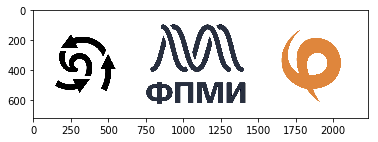

In [19]:
plt.imshow(image_png);

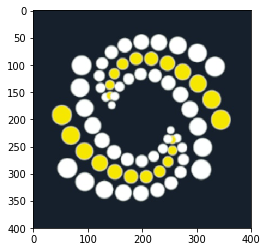

In [20]:
plt.imshow(image_jpg);

В данном случае **пиксель** -- это кортеж (упорядоченная последовательность чисел), состоящий из трёх чисел (как в примере раньше, например, (255,0,0) -- полностью красный пиксель). 

Итак, картинки -- это матрицы, состоящие из чисел, которые характеризуют насышенность данного пикселя определённым цветом цветом.  

Аналогично и с **чёрно-белыми изображениями** -- это просто матрица с одним каналом (то есть пксель -- это просто число), например, 28 на 28, каждое число которой от 0 до 255 характеризует яркость пикселя (насыщенность белым). 
Например, 255 -- это полностью белый пиксель, 0 -- полностью чёрный. Пора посмотреть, с чем мы будем работать в соревновании.

<h2 style="text-align: center;"><b>Данные (2)</b></h2>

Вернёмся к данным:

In [21]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [22]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Самый первый столбец -- **label**. Подробнее:

каждая картинка иметт класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [90]:
train_df.values[0]

array([  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
         0,   0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235,
       222, 255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180,
       207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 21

Видно, что это картинка типа Pullover (класс 2).

**Примечание:** у тестового датасета нужно удалить столбец label (по понятным причинам) -- вам нужно будет его предсказать и отправить эти предсказания в Kaggle.

Итак, мы имеем 60000 картинок, у каждой известна метка класса (то есть что это за одежда).  
Отделим `X` (признаковое описание объектов) и `y` (метки классов):

In [91]:
X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values  # [:, 1:]  # удаляем столбец 'label'

In [25]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [26]:
print(X_test.shape)

(10000, 784)


Но почему пиксели так странно представлены? На самом деле 784 пикселя -- это 28 * 28, то есть это "развёрнутая в строку" чёрно-белая картинка 28 на 28 пикселей.

Давайте убедимся в этом, отрисовав несколько (можете менять индекс и смотрть на отрисовку):

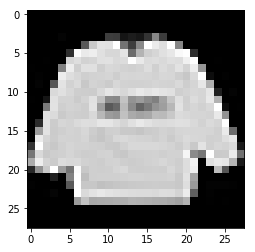

In [32]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray');

Не слишком похоже на пулловер, правда? :)  
    
Просто если мы будем использовать изображения большего разрешения, нам понадобятся бОльшие вычислительные мощности, поэтому пока что будем довольствоваться такими размерами.

Отлично, мы убедились в том, что имеем 60k картинок с метками для обучения, картинки "развёрнуты" в строку. Зачем разворачивать в строку? Потому что каждый пиксель в данном случае -- это один признак, то есть всего 784 признака, и уже их мы будем взвешивать нашей нейросетью, то есть у одного нейрона на входном слое будет 784 веса (+ Bias,  то есть 785 весов), на каждый пиксель по весу, и дальше уже будут второй слой, третий слой и так далее..

Время тренировать нейросети!

<h2 style="text-align: center;"><b>Нейросеть на PyTorch</b></h2>

Надеемся, что вы уже прорешали семинар, там довольно подробно всё описано. На всякий случай ещё раз напомним, из чего состоит процесс обучения нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят, например, типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **итераций обучения** (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

In [33]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Проверим версию PyTorch:

In [34]:
torch.__version__

'1.0.1'

Сначала обернём данные в тензоры пайторча (может занять некоторое время):

In [92]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

Проверим:

In [93]:
print(X_train_tensor.shape, y_train_tensor.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [94]:
y_train_tensor.unique()

tensor([2, 9, 6, 8, 0, 3, 4, 5, 7, 1])

На лекции обсуждалось, что нельзя просто запихнуть в LogLoss (основная функция потерь для задачи классификации, [как мы помним](https://drive.google.com/open?id=15wdyreZufKDxNQ55v4cl4Em2rtj7Q45B)) метки классов, предлагаем вам самим ещё раз подумать, почему. На всякий случай -- [ноутбук с более подробной информацией о функциях потерь](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W).

Так вот, нам надо преобразовать метки классов из целых чисел в OneHot-кодированные метки (если вам не знакомо это слово, [посмотрите первую половину этого видео](https://www.youtube.com/watch?v=ufkDhrngcr0)):

In [95]:
length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

print(y_train_tensor)
print(y_onehot)

tensor([2, 9, 6,  ..., 8, 8, 7])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])


Видим, что наши метки перешли в вид "единица там, где номер класса, а остальные нули".

Напишем код, очень похожий на код с семинара: возьмём два слоя -- входной и один скрытый (выходной обычно не считают, но он тоже есть):

In [96]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Обратите внимание:  

`D_in` -- это входная размерность (784 признака -- пикселя)  
`D_out` -- выходная размерность (10 классов -- типов одежды), то есть 10 нейронов на выходном слое  
`H` -- количество нейронов в скрытом слое  

Осталось выбрать Loss (функцию потерь) и метод оптимизации, с помощью которого мы будем считать градиенты и обновлять с помощью них обновлять веса.  

Loss мы выберем CrossEntropy, то есть кросс-энтропию, этот лосс почти всегда используется в задаче многоклассовой классификации (см. лекцию и ноутбук [loss_functions.ipynb](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W), там всё подробно объясняется), а метод оптимизации выберем обычный SGD (Stochastic Gradient Descent, стохастический градиентный спуск, см. лекцию про нейрон).

---

Однако перед тем, как перейти к коду обучения нейросети, есть одна тонкость -- **батчи**, а точнее **мини-батчи**.

**Мини-батчи** -- это небольшие (обычно размера 16, 32 или 64) "куски" выборки, то есть мини-батч размера 64 -- это 64 объекта из датасета. Обычно мини-батч называют просто батч (batch).

Так вот: методы оптимиазции по типу стохастического градиентного спуска часто считаются не под одному объекту (в этом случае оптимизация будет очень нестабильная, "шумная"), а по нескольким -- по батчу. То есть в обычном градиентном спуске будет сумма по всей выборке, в стохастическом (чистом варианте) -- по одному объекту, а "между ними" -- мини-батч SGD, то есть подсчёт градиентов на небольшом кусочке данных.

Одна **итерация (iteration)** алгоритма оптимизации -- это проход по одному батчу.
Одна **эпоха (epoch)** алгоритма оптимизации -- это проход по всей выборке. 

То есть, например, если выборка размера 60000, а батч размера 64, то одна эпоха занимает 60000 / 64 = 937,5 = 938 итераций.

---

Напишем функцию, генерирующую батчи:

In [97]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

Код обучения нейросети (обязателньо убедитесь, что понимаете, что делает каждая строчка -- это необходимо для ваших дальнейших экспериментов):

In [98]:
BATCH_SIZE = 64
NUM_EPOCHS = 10

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0, 100] current loss: 7.02133088684082
[0, 200] current loss: 6.927705070495605
[0, 300] current loss: 6.790727916717529
[0, 400] current loss: 6.727291492462158
[0, 500] current loss: 6.715491374969482
[0, 600] current loss: 6.698542587280273
[0, 700] current loss: 6.661754688262939
[0, 800] current loss: 6.687425708770752
[0, 900] current loss: 6.687195156097412
[1, 100] current loss: 6.660400993347168
[1, 200] current loss: 6.647340167999268
[1, 300] current loss: 6.655571491241455
[1, 400] current loss: 6.654634971618652
[1, 500] current loss: 6.648194412231446
[1, 600] current loss: 6.662285694122314
[1, 700] current loss: 6.629028701782227
[1, 800] current loss: 6.669887321472168
[1, 900] current loss: 6.669759357452393
[2, 100] current loss: 6.647708061218261
[2, 200] current loss: 6.625780815124512
[2, 300] current loss: 6.641566181182862
[2, 400] current loss: 6.631791854858398
[2, 500] current loss: 6.463297229766845
[2, 600] current loss: 6.387541774749756
[2, 700] current 

Отлично, мы получили обученную нейросеть. Давайте измерим качество на обучающей выбоорке:

In [42]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of T-shirt/top : 93 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 85 %
Accuracy of Dress : 91 %
Accuracy of  Coat : 86 %
Accuracy of Sandal : 98 %
Accuracy of Shirt :  0 %
Accuracy of Sneaker : 99 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot :  0 %


Уже сейчас видно, что сеть далеко не идеально -- она предсказывает только 7 классов, а про некоторые просто "забывает".

Теперь предскажем на тестовой и сохраним предсказания в файл. Это ни что иное, как baseline, который вам надо побить, чтобы получить хоть какие-то ненулевые баллы за это ДЗ.

In [43]:
y_test_pred = net(torch.FloatTensor(X_test))

C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [44]:
y_test_pred.shape

torch.Size([10000, 10])

In [45]:
y_test_pred[:5]

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 1.3370e-08, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.9975e-35, 2.8138e-37, 1.0000e+00, 1.0748e-31, 0.0000e+00,
         4.3351e-37, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       grad_fn=<SliceBackward>)

Преобразуем OneHot'ы в числовые метки:

In [46]:
_, predicted = torch.max(y_test_pred, 1)

predicted

tensor([0, 1, 2,  ..., 8, 8, 1])

Сохраним в датафрейм:

In [47]:
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

,Category
0,0
1,1
2,2
3,0
4,3


In [48]:
answer_df['Id'] = answer_df.index

In [49]:
answer_df.head()

,Category,Id
0,0,0
1,1,1
2,2,2
3,0,3
4,3,4


In [50]:
answer_df.tail()

,Category,Id
9995,0,9995
9996,2,9996
9997,8,9997
9998,8,9998
9999,1,9999


Отлично, созраним в файл и отправим:

In [51]:
answer_df.to_csv('./baseline.csv', index=False)

В точности этот файл и есть **baseline.csv**, который вы видите на лидерборде и который вам нужно побить.

<h2 style="text-align: center;"><b>Задание</b></h2>

Добейтесь как можно лучшего качества в соревновании!  

Используйте знания, полученные на занятиях и те, которые вы найдёте в интернете. Если у вас получится, можете использовать и свёрточные нейросети, а не только полносвязные. Вам нужно как минимум побить baseline.

*Рекомендация*: попробуйте поменять количество итераций, количество нейронов, количество слоёв, гиперпараметры сети (learning_rate, метод оптимизации вместо SGD можно взять другой)

In [238]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

In [224]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)



# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Softplus(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(H, H),
    torch.nn.Softplus(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(H, H),
    torch.nn.Softplus(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)


BATCH_SIZE = 64*2
NUM_EPOCHS = 200

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-5
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0, 100] current loss: 14.617304153442383
[0, 200] current loss: 14.333107009887696
[0, 300] current loss: 14.06945883178711
[0, 400] current loss: 13.831876235961914
[1, 100] current loss: 13.514010704040528
[1, 200] current loss: 13.432294479370118
[1, 300] current loss: 13.251510696411133
[1, 400] current loss: 13.131655410766601
[2, 100] current loss: 12.927021446228027
[2, 200] current loss: 12.863790176391602
[2, 300] current loss: 12.73532183074951
[2, 400] current loss: 12.60455884552002
[3, 100] current loss: 12.430702095031739
[3, 200] current loss: 12.372241371154786
[3, 300] current loss: 12.28559245300293
[3, 400] current loss: 12.117637794494629
[4, 100] current loss: 11.951608665466308
[4, 200] current loss: 11.973489639282226
[4, 300] current loss: 11.929819221496581
[4, 400] current loss: 11.8269790725708
[5, 100] current loss: 11.705728759765625
[5, 200] current loss: 11.718178871154786
[5, 300] current loss: 11.661035919189453
[5, 400] current loss: 11.61836180114746

[48, 200] current loss: 10.603575439453126
[48, 300] current loss: 10.607887725830079
[48, 400] current loss: 10.575371437072754
[49, 100] current loss: 10.604717178344726
[49, 200] current loss: 10.613036415100098
[49, 300] current loss: 10.603457885742188
[49, 400] current loss: 10.584008003234864
[50, 100] current loss: 10.584816429138183
[50, 200] current loss: 10.613697723388672
[50, 300] current loss: 10.604549766540528
[50, 400] current loss: 10.563455474853516
[51, 100] current loss: 10.59199935913086
[51, 200] current loss: 10.608089393615723
[51, 300] current loss: 10.591822052001953
[51, 400] current loss: 10.57390249633789
[52, 100] current loss: 10.582687850952148
[52, 200] current loss: 10.605868713378907
[52, 300] current loss: 10.597964797973633
[52, 400] current loss: 10.563621269226074
[53, 100] current loss: 10.577717330932618
[53, 200] current loss: 10.620449363708497
[53, 300] current loss: 10.614022789001465
[53, 400] current loss: 10.565559463500977
[54, 100] cur

[96, 200] current loss: 10.500691108703613
[96, 300] current loss: 10.494286697387695
[96, 400] current loss: 10.453779510498046
[97, 100] current loss: 10.466246299743652
[97, 200] current loss: 10.491163055419921
[97, 300] current loss: 10.495964065551759
[97, 400] current loss: 10.454249649047851
[98, 100] current loss: 10.47819499206543
[98, 200] current loss: 10.477087448120118
[98, 300] current loss: 10.504391082763672
[98, 400] current loss: 10.460063316345215
[99, 100] current loss: 10.467318008422852
[99, 200] current loss: 10.490260910034179
[99, 300] current loss: 10.494382553100586
[99, 400] current loss: 10.455580390930177
[100, 100] current loss: 10.478216766357422
[100, 200] current loss: 10.494302963256835
[100, 300] current loss: 10.494890014648437
[100, 400] current loss: 10.45199462890625
[101, 100] current loss: 10.483426376342774
[101, 200] current loss: 10.488919143676759
[101, 300] current loss: 10.495518394470215
[101, 400] current loss: 10.447500907897949
[102,

[143, 200] current loss: 10.287939453125
[143, 300] current loss: 10.29374510192871
[143, 400] current loss: 10.239551506042481
[144, 100] current loss: 10.281528327941894
[144, 200] current loss: 10.275191795349121
[144, 300] current loss: 10.282435844421387
[144, 400] current loss: 10.25683576965332
[145, 100] current loss: 10.26976323699951
[145, 200] current loss: 10.276444541931152
[145, 300] current loss: 10.257481239318848
[145, 400] current loss: 10.250482261657714
[146, 100] current loss: 10.262508003234863
[146, 200] current loss: 10.255773109436035
[146, 300] current loss: 10.285133987426757
[146, 400] current loss: 10.244309844970703
[147, 100] current loss: 10.245485816955567
[147, 200] current loss: 10.286219993591308
[147, 300] current loss: 10.27774521636963
[147, 400] current loss: 10.24849594116211
[148, 100] current loss: 10.259910522460938
[148, 200] current loss: 10.265109352111816
[148, 300] current loss: 10.275426055908204
[148, 400] current loss: 10.241670951843

[190, 200] current loss: 10.164030197143555
[190, 300] current loss: 10.179663238525391
[190, 400] current loss: 10.175954940795899
[191, 100] current loss: 10.151618209838867
[191, 200] current loss: 10.170950942993164
[191, 300] current loss: 10.168420043945313
[191, 400] current loss: 10.14676234436035
[192, 100] current loss: 10.15941219329834
[192, 200] current loss: 10.159631942749023
[192, 300] current loss: 10.179971572875976
[192, 400] current loss: 10.159455574035645
[193, 100] current loss: 10.168678298950196
[193, 200] current loss: 10.184223335266113
[193, 300] current loss: 10.156559219360352
[193, 400] current loss: 10.170924354553224
[194, 100] current loss: 10.156749519348145
[194, 200] current loss: 10.170431579589843
[194, 300] current loss: 10.161286430358887
[194, 400] current loss: 10.15281462097168
[195, 100] current loss: 10.164939964294433
[195, 200] current loss: 10.157075439453125
[195, 300] current loss: 10.168168601989747
[195, 400] current loss: 10.1628882

In [225]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of T-shirt/top : 86 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 80 %
Accuracy of Dress : 88 %
Accuracy of  Coat : 84 %
Accuracy of Sandal : 96 %
Accuracy of Shirt : 53 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 96 %
Accuracy of Ankle boot : 95 %


In [226]:
np.mean([class_correct[i] / class_total[i] * 100 for i in range(len(class_correct))])

87.52166666666668

In [227]:
y_test_pred = net(torch.FloatTensor(X_test))

_, predicted = torch.max(y_test_pred, 1)

predicted

answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

answer_df['Id'] = answer_df.index

name = input("try name - ")

try:
    os.stat("submits")
except:
    os.mkdir("submits")  

answer_df.to_csv('./submits/%s.csv' %(name), index=False)

C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


try name - try5


In [282]:
X_train_tensor = torch.FloatTensor(X_train)
X_train_tensor = X_train_tensor.view(60000,1,28,28)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)



# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
class ConvNet(torch.nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = torch.nn.Linear(7*7*64, num_classes)
        self.sm = torch.nn.Softmax()
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.sm(out)
        return out

net = ConvNet()

BATCH_SIZE = 64
NUM_EPOCHS = 100

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 2000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\ccord517\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[0, 100] current loss: 13.169599426269532
[0, 200] current loss: 11.806034721374512
[0, 300] current loss: 11.475335845947265
[0, 400] current loss: 11.06465153503418
[1, 100] current loss: 10.888420669555664
[1, 200] current loss: 10.852222610473634
[1, 300] current loss: 10.807555755615235
[1, 400] current loss: 10.73416756439209
[2, 100] current loss: 10.697514022827148
[2, 200] current loss: 10.693056587219239
[2, 300] current loss: 10.678404586791991
[2, 400] current loss: 10.620886917114257
[3, 100] current loss: 10.608323097229004
[3, 200] current loss: 10.610747543334961
[3, 300] current loss: 10.605639602661133
[3, 400] current loss: 10.552475708007812
[4, 100] current loss: 10.551778160095214
[4, 200] current loss: 10.556848129272462
[4, 300] current loss: 10.555736709594727
[4, 400] current loss: 10.504863052368163
[5, 100] current loss: 10.51155754852295
[5, 200] current loss: 10.517616340637208
[5, 300] current loss: 10.519492240905763
[5, 400] current loss: 10.46989344787

[48, 200] current loss: 10.218565055847169
[48, 300] current loss: 10.229461532592774
[48, 400] current loss: 10.187923789978028
[49, 100] current loss: 10.204659675598144
[49, 200] current loss: 10.21575170135498
[49, 300] current loss: 10.226833190917969
[49, 400] current loss: 10.185298957824706
[50, 100] current loss: 10.20221427154541
[50, 200] current loss: 10.212971809387208
[50, 300] current loss: 10.224146614074707
[50, 400] current loss: 10.182825942993164
[51, 100] current loss: 10.19986060333252
[51, 200] current loss: 10.210236206054688
[51, 300] current loss: 10.221672760009765
[51, 400] current loss: 10.180438247680664
[52, 100] current loss: 10.197629539489746
[52, 200] current loss: 10.207476989746095
[52, 300] current loss: 10.219268493652343
[52, 400] current loss: 10.177920539855958
[53, 100] current loss: 10.195275566101074
[53, 200] current loss: 10.204884567260741
[53, 300] current loss: 10.216833099365234
[53, 400] current loss: 10.175591133117676
[54, 100] curr

KeyboardInterrupt: 

In [283]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

C:\Users\ccord517\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of T-shirt/top : 96 %
Accuracy of Trouser : 99 %
Accuracy of Pullover : 95 %
Accuracy of Dress : 96 %
Accuracy of  Coat : 89 %
Accuracy of Sandal : 99 %
Accuracy of Shirt :  0 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 97 %


In [284]:
np.mean([class_correct[i] / class_total[i] * 100 for i in range(len(class_correct))]), np.min([class_correct[i] / class_total[i] * 100 for i in range(len(class_correct))]), np.max([class_correct[i] / class_total[i] * 100 for i in range(len(class_correct))])

(87.13500000000002, 0.0, 99.15)

In [281]:
y_test_pred = net(torch.FloatTensor(X_test).view(10000, 1, 28, 28))

_, predicted = torch.max(y_test_pred, 1)

predicted

answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

answer_df['Id'] = answer_df.index

name = input("try name - ")

try:
    os.stat("submits")
except:
    os.mkdir("submits")  

answer_df.to_csv('./submits/%s.csv' %(name), index=False)

C:\Users\ccord517\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


try name - try9cnn


<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*